#### Dataset
dataset that is used here is https://www.kaggle.com/c/leaf-classification/data

In [2]:
# packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

### Load the Dataset, visualize the data, and describe the data

In [3]:
# load the dataset
path = 'train.csv'
df = read_csv(path)
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


### Cleaning

In [4]:
# remove empty cells
df.dropna(inplace = True)
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [5]:
# remove duplicates
df.drop_duplicates(inplace = True)
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [6]:
print(len(df['species'].unique()))
print(df.values[:, 2:][1])
print(len(df['species'].values))

99
[0.005859 0.0 0.03125 0.015625 0.025391 0.001953 0.019531 0.0 0.0 0.007812
 0.003906 0.027344 0.023438 0.0 0.033203 0.0 0.009766 0.009766 0.007812
 0.007812 0.019531 0.007812 0.0 0.0 0.007812 0.027344 0.003906 0.037109
 0.007812 0.048828 0.054688 0.027344 0.003906 0.0 0.0 0.003906 0.013672
 0.033203 0.033203 0.019531 0.03125 0.009766 0.007812 0.03125 0.001953
 0.039062 0.029297 0.03125 0.035156 0.0 0.007812 0.0 0.046875 0.046875
 0.029297 0.009766 0.017578 0.007812 0.013672 0.019531 0.0 0.0 0.003906
 0.0 0.00074942 0.00069461 0.0007198 0.00070948 0.00068849 0.00066046
 0.00062381 0.00058531 0.00055583 0.00053091 0.00050553 0.00048417
 0.00046714 0.00045311 0.0004424 0.0004347 0.00043541 0.00043311
 0.00044305 0.00046024 0.00047142 0.00048563 0.00051198 0.00053842
 0.000567 0.00060459 0.00064376 0.00068698 0.00073141 0.00077748
 0.00083219 0.00088429 0.00090166 0.00086166 0.00084172 0.0007829
 0.00073129 0.00067913 0.00063886 0.00059633 0.00056019 0.00052754
 0.00049597 0.00047412 0.

### data description
The dataset consists approximately 990 leaf specimens/images, and its features. Three sets of features are also provided per row or image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

### Draw some of the images

In [7]:
import cv2
# read image 
image = cv2.imread('images/1.jpg')
# show the image, provide window name first
cv2.imshow('image window 1', image)
# add wait key. window waits until user presses a key
cv2.waitKey(0)
# and finally destroy/close all open windows
cv2.destroyAllWindows()
# read image 
image = cv2.imread('images/2.jpg')
# show the image, provide window name first
cv2.imshow('image window 2', image)
# add wait key. window waits until user presses a key
cv2.waitKey(0)
# and finally destroy/close all open windows
cv2.destroyAllWindows()

### one-hot-encoding and spit data into training set, validation set, and testing set

In [8]:
# split into input and output columns
X, y = df.values[:, 2:], df['species'].values
print(X.shape)
print(y.shape)
print(X[1])
print(y[1])
X = X.astype('float64') # ensure all data are floating point values
# encode strings to integer
y = LabelEncoder().fit_transform(y)
print(y[1])
# y_one_hot_encoding = LabelBinarizer().fit_transform(y)
# print(y_one_hot_encoding.shape)
# print(y_one_hot_encoding[1])

(990, 192)
(990,)
[0.005859 0.0 0.03125 0.015625 0.025391 0.001953 0.019531 0.0 0.0 0.007812
 0.003906 0.027344 0.023438 0.0 0.033203 0.0 0.009766 0.009766 0.007812
 0.007812 0.019531 0.007812 0.0 0.0 0.007812 0.027344 0.003906 0.037109
 0.007812 0.048828 0.054688 0.027344 0.003906 0.0 0.0 0.003906 0.013672
 0.033203 0.033203 0.019531 0.03125 0.009766 0.007812 0.03125 0.001953
 0.039062 0.029297 0.03125 0.035156 0.0 0.007812 0.0 0.046875 0.046875
 0.029297 0.009766 0.017578 0.007812 0.013672 0.019531 0.0 0.0 0.003906
 0.0 0.00074942 0.00069461 0.0007198 0.00070948 0.00068849 0.00066046
 0.00062381 0.00058531 0.00055583 0.00053091 0.00050553 0.00048417
 0.00046714 0.00045311 0.0004424 0.0004347 0.00043541 0.00043311
 0.00044305 0.00046024 0.00047142 0.00048563 0.00051198 0.00053842
 0.000567 0.00060459 0.00064376 0.00068698 0.00073141 0.00077748
 0.00083219 0.00088429 0.00090166 0.00086166 0.00084172 0.0007829
 0.00073129 0.00067913 0.00063886 0.00059633 0.00056019 0.00052754
 0.0004959

### Preprocessing

- Normalization
- Train / test split

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# split into train validation, and test datasets
#
xrest, X_test, yrest, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8 , shuffle = True , random_state=42)
X_train, xval, y_train, yval = train_test_split(xrest,yrest,test_size = 0.25,train_size =0.75 , shuffle = True , random_state=42)

#
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, xval.shape, yval.shape)

# normalization
# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler() # we estimated the mean and varience of the training set, and divide by train set to make mean = 0 ; standard deviation = 1.0
X_train = scaler.fit_transform(X_train) # we use the same estimation to test set
X_test = scaler.transform(X_test)
xval = scaler.transform(xval)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, xval.shape, yval.shape)

(594, 192) (198, 192) (594,) (198,) (198, 192) (198,)
(594, 192) (198, 192) (594,) (198,) (198, 192) (198,)


In [10]:
X_train.dtype

dtype('float64')

In [11]:
# determine the number of input features
n_features = X_train.shape[1] # X_train.shape[0] is no. of training samples, and X_train.shape[1] is no. of features in training sample
n_classes = len(np.unique(df['species'].values))
print(n_features, n_classes)

192 99


In [12]:
# one-hot-encoding
from keras.utils import np_utils
from keras.utils import to_categorical
y_train=to_categorical(y_train,n_classes)
y_test=to_categorical(y_test,n_classes)
yval=to_categorical(yval,n_classes)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, xval.shape, yval.shape)

(594, 192) (198, 192) (594, 99) (198, 99) (198, 192) (198, 99)


### correlation analysis

In [13]:
print(df.corr())

                 id   margin1   margin2   margin3   margin4   margin5  \
id         1.000000 -0.011673 -0.027565 -0.059533  0.001639 -0.002419   
margin1   -0.011673  1.000000  0.806390 -0.182829 -0.297807 -0.475874   
margin2   -0.027565  0.806390  1.000000 -0.204640 -0.315953 -0.444312   
margin3   -0.059533 -0.182829 -0.204640  1.000000  0.120042 -0.185007   
margin4    0.001639 -0.297807 -0.315953  0.120042  1.000000  0.029480   
...             ...       ...       ...       ...       ...       ...   
texture60 -0.000823  0.035072  0.081069 -0.019850 -0.052317  0.006542   
texture61  0.026319 -0.007581 -0.007057  0.084957  0.320644 -0.109229   
texture62  0.032873 -0.033159 -0.037405 -0.081999 -0.073886  0.151675   
texture63  0.024299 -0.075171 -0.098957 -0.148193  0.050970  0.022299   
texture64  0.035396  0.030414 -0.029532  0.061780  0.014343 -0.148834   

            margin6   margin7   margin8   margin9  ...  texture55  texture56  \
id        -0.051818  0.061214 -0.039509 -0.

**no much correlation between certain column and the other columns**

### tunning

In [15]:
y_train.shape, X_train.shape

((594, 99), (594, 192))

##### GridSearch

In [16]:
# Function to create model, required for KerasClassifier
from keras.layers import Dropout
def create_model(neurons, dropout_rate, optimizer='adam'):
    # create model 
    model = Sequential()
    model.add(Dense(neurons, activation='tanh', input_shape=(n_features,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,  metrics=['categorical_accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1)
# define the grid search parameters
batch_size = [32, 64, 128]
epochs = [50, 100]
optimizer = ['SGD', 'RMSprop', 'Adam']
learn_rate = [0.001, 0.01, 0.0001]
momentum = [0.0]
dropout_rate = [0.0, 0.4, 0.7]
neurons = [128, 200, 300]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum, optimizer=optimizer, batch_size=batch_size, epochs=epochs, model__dropout_rate=dropout_rate, model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(xval, yval, verbose = 1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/50
7/7 [==============================] - 2s 5ms/step - loss: 4.5362 - categorical_accuracy: 0.0505 
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 3.1434 - categorical_accuracy: 0.4343
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 2.2554 - categorical_accuracy: 0.6919
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6425 - categorical_accuracy: 0.7980
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 1.1954 - categorical_accuracy: 0.8838
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.8973 - categorical_accuracy: 0.9242
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6754 - categorical_accuracy: 0.9697
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5191 - categorical_accuracy: 0.9949
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4021 - categorical_accuracy: 1.0000
Epoch 10/50
7/7 [==========

0.535354 (0.049997) with: {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.7, 'model__neurons': 128, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.0001, 'optimizer__momentum': 0.0}
0.535354 (0.061025) with: {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.7, 'model__neurons': 200, 'optimizer': 'SGD', 'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.0}
0.520202 (0.061025) with: {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.7, 'model__neurons': 200, 'optimizer': 'SGD', 'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.0}
0.540404 (0.070345) with: {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.7, 'model__neurons': 200, 'optimizer': 'SGD', 'optimizer__learning_rate': 0.0001, 'optimizer__momentum': 0.0}
0.530303 (0.044605) with: {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.7, 'model__neurons': 200, 'optimizer': 'RMSprop', 'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.0}
0.550505 (0.031133) with

##### training

In [17]:
# best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.575758 using {'batch_size': 32, 'epochs': 50, 'model__dropout_rate': 0.0, 'model__neurons': 300, 'optimizer': 'RMSprop', 'optimizer__learning_rate': 0.0001, 'optimizer__momentum': 0.0}


In [18]:
parameters = grid_result.best_params_
nuerons = parameters['model__neurons']
dropout_rate = parameters['model__dropout_rate']
optimizer = parameters['optimizer']
epochs = parameters['epochs']
batch_size = parameters['batch_size']
print(nuerons, dropout_rate, optimizer, int(epochs), batch_size, type(int(epochs)))
model = Sequential()
model.add(Dense(int(nuerons), activation='tanh', input_shape=(n_features,)))
model.add(Dropout(dropout_rate))
model.add(Dense(n_classes, activation='softmax'))


300 0.0 RMSprop 50 32 <class 'int'>


In [15]:
model = Sequential()
model.add(Dense(300, activation='tanh', input_shape=(n_features,)))
model.add(Dropout(0.0))
model.add(Dense(n_classes, activation='softmax'))

In [21]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),  metrics=['categorical_crossentropy'])
# fit the model
training = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)


Epoch 1/50
17/17 [==============================] - 1s 16ms/step - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.0555 - val_categorical_crossentropy: 0.0555
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.0551 - val_categorical_crossentropy: 0.0551
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.0550 - val_categorical_crossentropy: 0.0550
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0043 - categorical_crossentropy: 0.0043 - val_loss: 0.0549 - val_categorical_crossentropy: 0.0549
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.0547 - val_categorical_crossentropy: 0.0547
Epoch 6/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.0548 - val_

17/17 [==============================] - 0s 6ms/step - loss: 0.0027 - categorical_crossentropy: 0.0027 - val_loss: 0.0500 - val_categorical_crossentropy: 0.0500
Epoch 49/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0026 - categorical_crossentropy: 0.0026 - val_loss: 0.0499 - val_categorical_crossentropy: 0.0499
Epoch 50/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0026 - categorical_crossentropy: 0.0026 - val_loss: 0.0498 - val_categorical_crossentropy: 0.0498


No handles with labels found to put in legend.


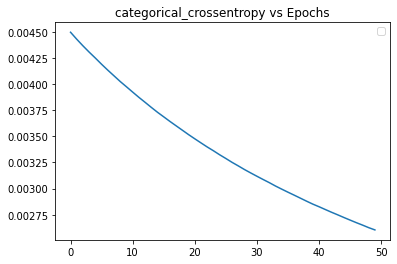

In [22]:
plt.title('categorical_crossentropy vs Epochs')
plt.plot(training.history['categorical_crossentropy']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


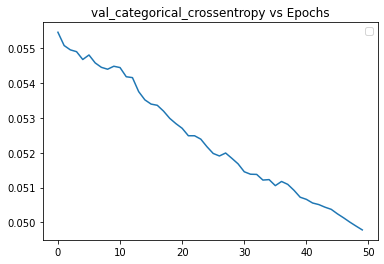

In [23]:
plt.title('val_categorical_crossentropy vs Epochs')
plt.plot(training.history['val_categorical_crossentropy']) 
plt.legend()
plt.show()

#####  evaluation

In [24]:
# evaluate the model
def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test, verbose=1)
    return loss
loss = evaluate_model(model, X_test, y_test)
print('test loss', loss)

7/7 [==============================] - 0s 2ms/step - loss: 0.2211 - categorical_crossentropy: 0.2211
test loss [0.2210792899131775, 0.2210792899131775]


### kaggle

In [25]:
# load the dataset
path = 'test.csv'
test_df = read_csv(path)
test_df

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


In [26]:
# split into input and output columns
import numpy as np
test_X = test_df.values[:, 0:]
print(test_X.shape)
print(test_X[0][1])
test_X = test_X.astype('float64') # ensure all data are floating point values
x_test = test_X[:, 1:]
x_test = scaler.transform(x_test)
print(x_test.shape)
print(x_test[0])

(594, 193)
0.019531
(594, 192)
[ 1.03008102e-01 -4.89578381e-01  1.86357296e+00 -3.85267810e-01
 -5.49861318e-01 -4.52044328e-01 -7.90785284e-01 -4.19629064e-01
 -1.21437934e-01  2.56155413e-01 -7.05013499e-01  8.44298651e-01
  7.21685644e-01 -4.30934077e-01  1.41477307e+00 -9.39750562e-02
 -1.25898538e+00  5.71652083e-02 -7.18400438e-01  2.31022229e-01
 -4.81319618e-01 -6.00640596e-01 -2.21545845e-01 -1.32325376e-01
 -7.01441819e-02 -2.55965256e-01 -4.94056343e-01  1.65648002e-01
  5.88850723e-02  2.85993873e-01 -5.43559223e-01 -3.04492135e-01
  3.70309809e-01 -5.17467736e-01  2.28076860e-02 -7.40273127e-01
  2.35775311e+00  1.46253971e+00  1.26901711e+00 -1.87230134e-01
 -2.94465548e-01 -1.09072028e+00  1.32612886e-01  1.11962601e+00
 -7.67192204e-01 -6.39964479e-01 -8.08408393e-02  1.33838501e+00
 -5.39153280e-01 -1.31765075e-01  1.90848182e-01 -1.04451956e-01
 -6.97875307e-01 -3.79038738e-01 -4.91635584e-01 -6.72590648e-01
 -3.05715785e-01 -8.85164037e-01  7.45717689e-01 -9.5600288

In [27]:
# evaluate the model
import pandas as pd  
def eval_model(model, X_test, class_names, ids):
    y_pred = model.predict(X_test)
    k_df = pd.DataFrame(y_pred, columns=class_names)
    k_df['id'] = ids
    return k_df

In [28]:
k_df = eval_model(model, x_test, sorted(df['species'].unique()), test_df['id'].values)
k_df.to_csv("test_results.csv", index=False)
k_df

19/19 [==============================] - 0s 2ms/step


,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata,id
0,4.076913e-05,1.241548e-04,5.839184e-07,5.129814e-04,3.858877e-05,6.333100e-05,2.231470e-06,0.000011,1.338254e-05,1.274210e-04,...,8.509530e-05,4.473661e-05,3.721268e-06,4.469444e-05,6.771128e-06,2.191472e-05,4.454155e-07,1.326077e-03,4.019842e-06,4
1,2.269474e-07,2.741940e-07,2.271056e-06,9.315438e-05,1.319451e-07,2.492812e-06,1.743945e-04,0.000002,6.144991e-07,6.319500e-07,...,4.189719e-06,2.539464e-07,3.179580e-08,9.717258e-09,1.185483e-04,1.080897e-05,1.644523e-05,2.171818e-06,2.735979e-07,7
2,1.285405e-05,9.867401e-01,1.064108e-05,2.235249e-06,6.851715e-03,2.366688e-05,4.107446e-06,0.000086,6.003045e-04,6.432307e-05,...,7.125725e-06,6.503007e-06,1.642632e-06,6.421500e-07,1.376450e-05,5.981086e-05,1.030409e-07,3.317210e-06,4.005594e-04,9
3,1.252050e-05,7.985756e-03,3.536421e-05,1.630194e-05,1.999937e-05,2.457319e-05,4.587710e-04,0.000058,4.404612e-04,2.135462e-04,...,1.273950e-05,2.257638e-05,6.326851e-06,1.349006e-05,2.510913e-04,1.716821e-03,7.034958e-05,5.117502e-06,4.778965e-04,12
4,7.658356e-05,1.886167e-04,7.964876e-06,2.190619e-06,6.439604e-05,4.104415e-06,1.461819e-04,0.000031,6.534347e-03,2.750252e-04,...,5.587980e-06,1.790019e-04,3.727838e-05,1.771581e-03,1.335384e-03,1.573864e-02,2.548704e-05,7.239965e-05,5.497418e-06,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,2.407753e-05,9.962231e-01,2.566853e-05,9.373770e-07,1.286212e-03,1.796198e-06,5.262132e-07,0.000014,1.585312e-04,1.119660e-05,...,7.965167e-06,2.175260e-06,1.220618e-06,2.088549e-07,5.008652e-06,1.183893e-04,1.766233e-07,1.462596e-06,2.977544e-04,1576
590,4.750816e-05,7.735743e-06,2.951737e-07,4.721642e-05,3.417423e-07,2.188801e-07,1.333265e-06,0.000053,7.052679e-04,1.803344e-07,...,6.055191e-07,3.577938e-04,9.227833e-07,4.275374e-04,1.234014e-04,1.012481e-05,1.481107e-07,5.357485e-07,1.588114e-04,1577
591,1.955685e-05,4.564098e-06,4.375251e-07,2.867774e-07,9.415805e-06,2.197509e-05,4.808410e-07,0.000021,4.585994e-07,2.291798e-05,...,3.716148e-08,2.666313e-06,8.352768e-06,7.491772e-06,8.475816e-09,2.708916e-08,2.051024e-06,1.888854e-06,6.652789e-05,1579
592,2.422213e-04,2.059631e-04,2.660776e-03,8.338656e-05,3.056949e-04,1.060403e-04,1.889601e-03,0.000159,3.910348e-05,1.415417e-06,...,2.172907e-03,1.828759e-05,1.309958e-03,5.321371e-05,5.572961e-04,1.354813e-04,1.651493e-04,3.464843e-05,2.540427e-05,1580


#### the score
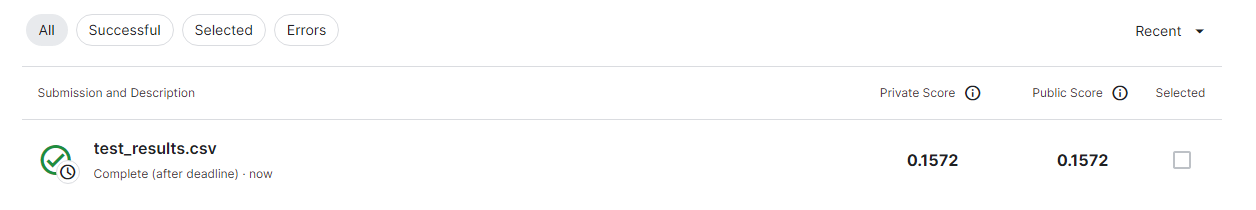